<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data preparation, dimensionality reduction***

###**Tenggat Waktu: 4 Maret 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **4 Maret 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "IQBAL PAHLEVI AMIN"
KELAS = "KASDD - B"
NPM = "2106752281"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/",
    'PPT PCA'
]

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, IQBAL PAHLEVI AMIN dari kelas KASDD - B dengan NPM 2106752281, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (IQBAL PAHLEVI AMIN)


# Data Preprocessing 

*Data Preparation* atau *data preprocessing* adalah suatu proses **pembersihan dan transformasi** pada *raw data* **sebelum** diproses dan dianalisis oleh model Machine Learning. Pernah dengar ungkapan "Garbage In - Garbage Out?", dalam konteks Machine Learning, jika input data yang kita miliki buruk maka hasil pengolahan data pun akan buruk. *Data Preprocessing* dilakukan agar data input sudah berupa data yang akurat dan berkualitas sehingga hasil yang dikeluarkan oleh model bisa optimal. 


## Deskripsi Dataset

Latihan ini menggunakan Dataset mengenai kualitas air dari berbagai region dengan total 2508 baris beserta penjelasan atribut sebagai berikut:


*  `pH` : Indikator asam dan basa dalam air (*range* : 1 - 14)
*  `Hardness` : Kapasitas air untuk mengendapkan sabun (mg/L) 
*  `Solids` : Total dissolved solids (ppm) 
*  `Chloramines` : Jumlah Chloramines (ppm)
*  `Sulfate` : Jumlah Sulfates terlarut (mg/L)
*  `Conductivity` : Konduktivitas elektrik dalam air (μS/cm)
*  `Organic_carbon` : Jumlah karbon organik (ppm) 
*  `Trihalomethanes` : Jumlah Trihalomethanes (μg/L)
*  `Turbidity` : Ukuran properti pemancar cahaya air (NTU)
*  `Potability` : Mengindikasikan apakah air tersebut aman untuk diminum (*potable*, nilai 1) atau tidak aman diminum (*not potable*, nilai 2)

Sumber dataset: https://www.kaggle.com/datasets/adityakadiwal/water-potability dengan perubahan

In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler

In [ ]:
# Import dataset 
water_df = pd.read_csv('water_potability.csv')

In [ ]:
# Melihat shape dari dataframe
total_rows, total_attributes = water_df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat 5 elemen pertama dari dataset
water_df.head()

Jumlah data: 2508
Jumlah atribut: 11


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Unnamed,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,NaN,2
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,NaN,2
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,NaN,2
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,NaN,2
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,NaN,2


*   Kita dapat melihat bahwa terdapat 2508 dengan 11 atribut, yaitu 10 atribut input dan 1 atibut output 
*   Terdapat beberapa NaN values yang terlihat pada 5 baris pertama



In [ ]:
# Melihat kolom-kolom pada dataframe
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2120 non-null   float64
 1   Hardness         2508 non-null   float64
 2   Solids           2508 non-null   float64
 3   Chloramines      2508 non-null   float64
 4   Sulfate          1902 non-null   float64
 5   Conductivity     2508 non-null   float64
 6   Organic_carbon   2508 non-null   float64
 7   Trihalomethanes  2382 non-null   float64
 8   Turbidity        2508 non-null   float64
 9   Unnamed          0 non-null      float64
 10  Potability       2508 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 215.7 KB


In [ ]:
#Melihat deskripsi statistik dataframe
#water_df.drop('Potability', axis=1).describe()
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Unnamed,Potability
count,2120.000000,2508.000000,2508.000000,2508.000000,1902.000000,2508.000000,2508.000000,2382.000000,2508.000000,0.0,2508.000000
mean,7.072357,196.184162,21865.656807,7.105380,335.445493,425.506064,14.353307,66.205995,3.962576,NaN,1.835726
std,1.640909,31.683505,8457.596593,1.531576,39.658018,80.280866,3.318000,15.996036,0.783669,NaN,0.370598
min,0.000000,97.280909,320.942611,1.390871,129.000000,181.483754,4.371899,2.738000,1.450000,NaN,1.000000
25%,6.052868,177.195106,15796.399700,6.185621,310.583713,366.446965,12.118659,55.607074,3.437822,NaN,2.000000
50%,7.025663,196.778920,20866.335845,7.105225,333.583132,421.258539,14.250495,66.329410,3.941522,NaN,2.000000
75%,8.115830,216.016872,27093.667258,8.067799,359.246947,481.223518,16.619029,77.196182,4.498256,NaN,2.000000
max,14.000000,317.338124,61227.196010,12.653362,481.030642,753.342620,28.300000,124.000000,6.739000,NaN,2.000000


Berdasarkan deskripsi statistik, kita bisa menyimpulkan beberapa hal:

*   Karena selisih nilai mean-median yang kecil, kita bisa mengetahui bahwa distribusi data semua atribut relatif normal 
*   Skala nilai pada masing-masing atribut tidak sama (ada yang memiliki range dalam satuan, ada yang hingga ribuan)
*   **Terdapat atribut "Unnamed" dengan count 0 dan nilai statistik lainnya berupa NaN, bisa kita simpulkan bahwa atribut ini tidak memiliki value sama sekali (100% missing value) sehingga bisa kita drop, akan kita handle pada bagian berikutnya**



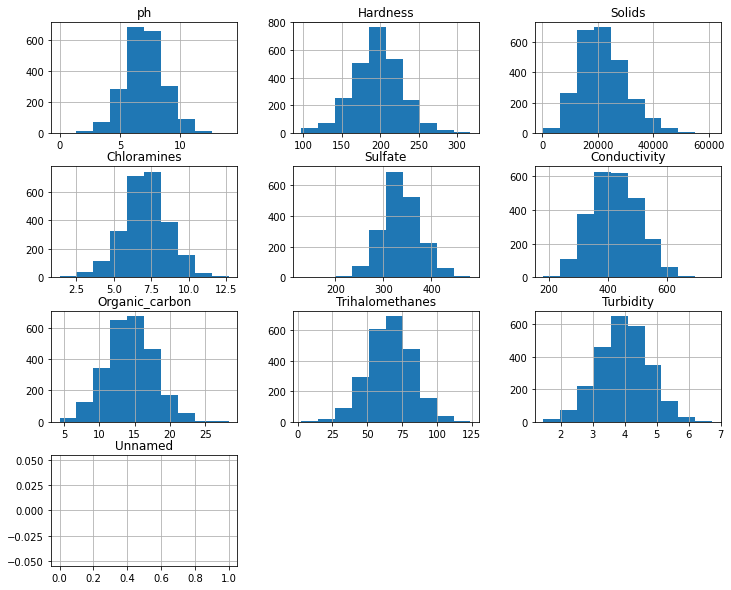

In [ ]:
# Melihat distribusi data
water_df.drop('Potability', axis=1).hist(figsize=(12,10));

In [ ]:
# Melihat nilai skew dari atribut
water_df.drop('Potability', axis=1).skew()

ph                 0.035825
Hardness          -0.020426
Solids             0.603543
Chloramines       -0.047196
Sulfate            0.081847
Conductivity       0.237656
Organic_carbon     0.062350
Trihalomethanes   -0.085517
Turbidity         -0.005013
Unnamed                 NaN
dtype: float64

Sesuai dugaan, distribusi data relatif normal, kecuali atribut "Solids" dan "Conductivity" yang cenderung right skew

<AxesSubplot:>

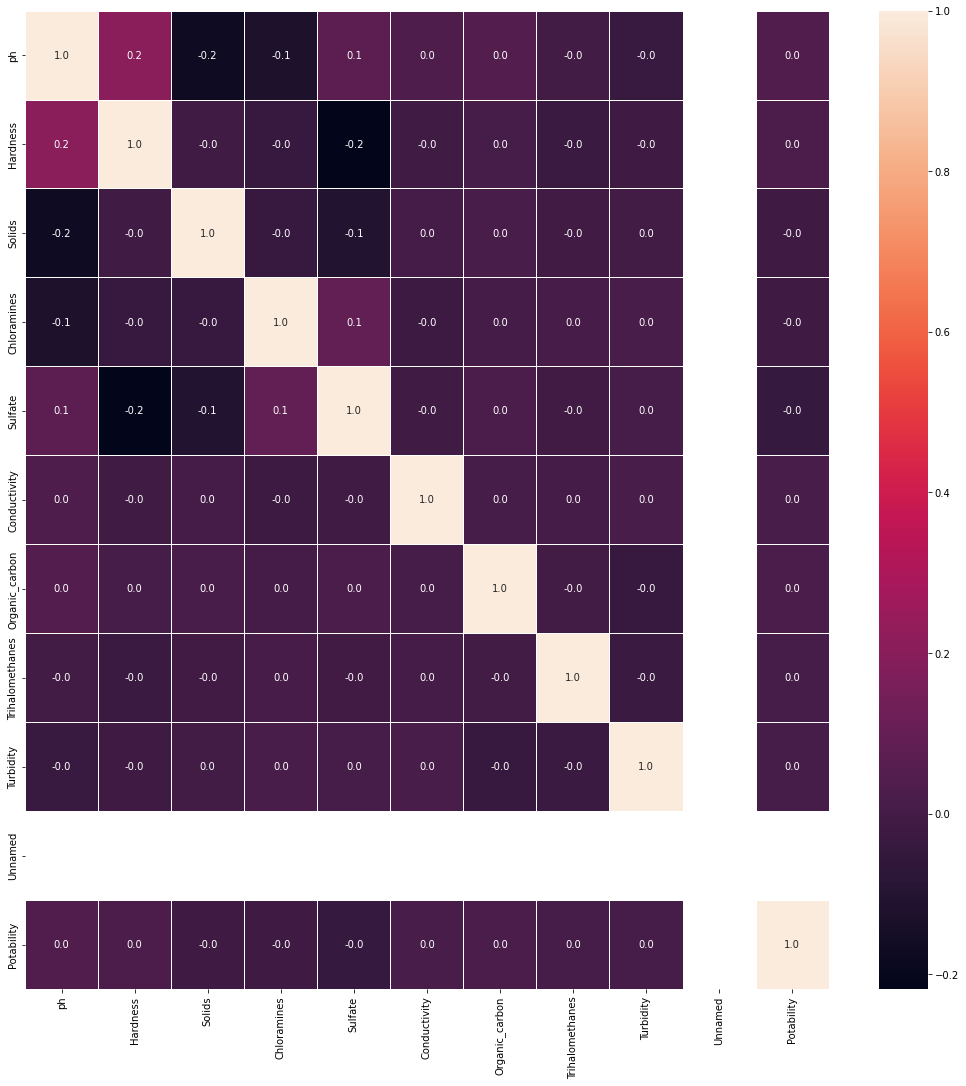

In [ ]:
# heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(water_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Berdasarkan perhitungan nilai korelasi, kita dapat melihat bahwa masing-masing atribut tidak saling berkorelasi.

In [ ]:
# Menghitung frekuensi nilai output
water_df['Potability'].value_counts(normalize=True)

2    0.835726
1    0.164274
Name: Potability, dtype: float64

Apabila kita lihat, nilai "Potability" tidak seimbang, dimana 84% data memiliki Potability = 2 (Tidak Potable, tidak bisa diminum) dan hanya 16% data yang memiliki nilai Potability = 1 (Potable, bisa diminum)

Setelah mengetahui deskripsi dataset yang akan digunakan, kita akan memulai proses *data pre-processing*. Pada pengerjaan lab ini, pre-processing yang akan kita lakukan adalah: penanganan duplikasi data, penanganan outlier, dan penanganan missing value.

## Penanganan Duplikasi Data 

Duplikasi data terutama dalam jumlah yang besar dapat mempengaruhi model machine learning, sehingga penanganan terhadap data duplikat harus dilakukan. Umumnya, penanganan duplikasi data dapat dilakukan dengan operasi drop sebagai berikut:

`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

Parameter: 

*   subset: digunakan untuk menspesifikasi kolom tertentu yang ingin kita tangani, misalnya hanya dua kolom yang ingin dihapus duplikatnya maka kita bisa mengisi bagian tsb dengan `subset=['kolom1', 'kolom2']`
*   keep: menentukan nilai duplikat mana yang ingin kita simpan, secara default `keep='first'` artinya kemunculan data duplikasi pertama yang akan disimpan pada dataframe dan data berikutnya yang nilainya sama akan dihapus. 
*   inplace: apakah akan menghapus data duplikat langsung pada dataframe tersebut (inplace) atau me-*return* copy

(dokumentasi lengkap: [Dokumentasi Drop Duplicate](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.drop_duplicates.html)) 



**Soal 1(a)** : Dari data water_df di atas, apakah terdapat redudansi data? Implementasikan dengan code!

In [ ]:
# 1(a) Implementasi code di sini

# ada duplikasi data
duplicates = water_df.duplicated()
water_df[duplicates]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Unnamed,Potability
2410,9.347345,201.632836,13749.59604,7.333742,322.044667,512.446305,12.434716,43.827119,3.615151,NaN,2
2411,11.621140,203.730368,15102.23743,7.816415,NaN,447.045213,21.632385,61.801804,3.472067,NaN,2
2412,10.337671,163.276225,21820.29588,7.899521,356.179637,561.206238,14.116324,56.193061,5.063109,NaN,2
2413,NaN,196.051741,21919.47016,6.730277,359.701352,401.731338,14.219303,77.605726,3.954964,NaN,2
2414,5.287983,245.023461,27733.71310,7.135063,238.844004,464.074850,13.452179,55.642363,3.311034,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
2503,6.616731,195.096968,34277.76040,7.632639,NaN,417.465080,13.432557,47.945936,3.622379,NaN,2
2504,7.734569,230.919506,21776.59446,6.908591,NaN,395.114961,15.033557,92.697369,3.821456,NaN,2
2505,6.971577,185.906938,27959.98787,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,NaN,2
2506,4.709187,179.141018,22291.41858,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,NaN,2


**Soal 1(b)** : Apa yang dapat Anda lakukan untuk menangani redudansi data tersebut? Implementasikan dengan code!

In [ ]:
# 1(b) Implementasi code di sini

# drop duplikasi data
water_df = water_df.drop(index=water_df[duplicates].index)

**Soal 1(c)** : Menurut Anda, mengapa redudansi data perlu ditangani?

> - untuk menghilangkan bias pada saat training model yang dapat menyebabkan overfitting
- meingkatkan efisiensi karena redundant data dapat memperlambat proses training karena algoritma model akan menggunakan waktu untuk data tsb (padahal tidak penting)

## Penanganan Outlier

Outlier merupakan observasi yang tidak biasa yang muncul pada salah satu titik ekstrim dari sebagian besar data. Titik ekstrim di sini adalah nilai yang terlalu kecil atau nilai yang terlalu besar jika dibandingkan dengan sebagian besar nilai lain dalam kelompoknya. 

### Deteksi Outlier

Deteksi outlier dapat dilakukan dengan beberapa cara, salah satunya dengan menggunakan visualisasi boxplot.

<AxesSubplot:>

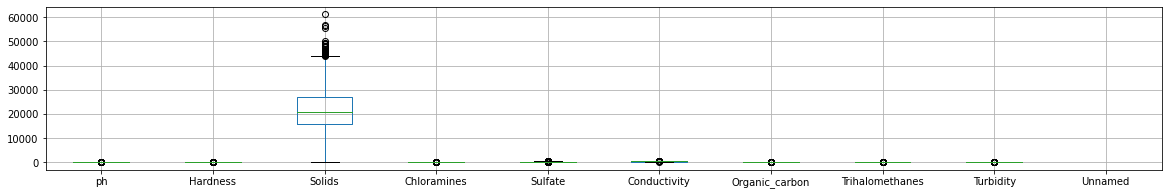

In [ ]:
data = water_df.drop(['Potability'], axis=1)
data.boxplot(figsize=(20,3))

Apabila kita lihat berdasarkan boxplot di atas, secara kasar kita bisa mengetahui bahwa pada atribut "Solids" terdapat nilai yang berada di atas garis whisker (garis perpanjangan dari kotak Box) yang selanjutnya bisa kita identifikasi sebagai outliers. Namun, kita kurang bisa mendapatkan insights keberadaan outlier pada atribut lainnya karena bentuk boxplot yang kurang terlihat salah satunya karena skala nilai pada atribut lain tidak sebanding dengan atribut Solids. Oleh karena itu, pada latihan ini kita juga akan mencoba melakukan **scaling** untuk menyamakan range nilai pada dataset.

In [ ]:
# Import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

vis_outlier = pd.DataFrame(scaled_data)
vis_outlier.columns = data.columns.values.tolist()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


<AxesSubplot:>

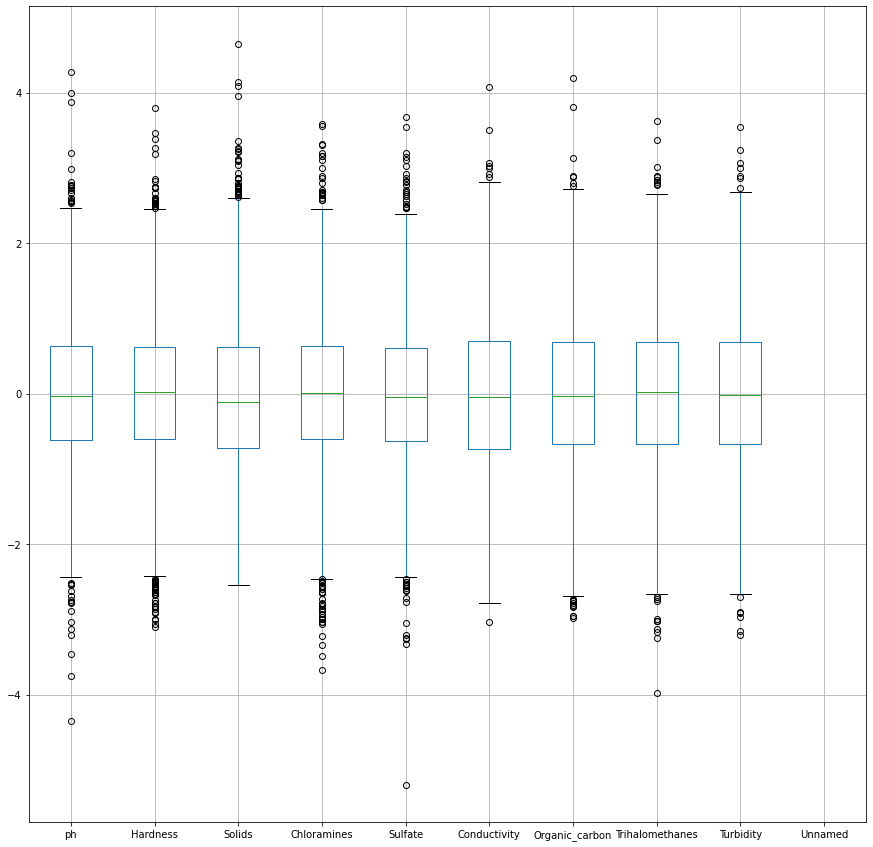

In [ ]:
vis_outlier.boxplot(figsize=(15,15))

Berdasarkan visualisasi Box Plot di atas, dapat kita lihat bahwa atribut pH memiliki beberapa outlier yang berada di luar garis whisker. **Namun, apakah nilai tersebut dapat kita katakan sebagai outlier?** Mari kita lihat visualisasi sebelum dilakukannya scaling pada atribut pH

<AxesSubplot:>

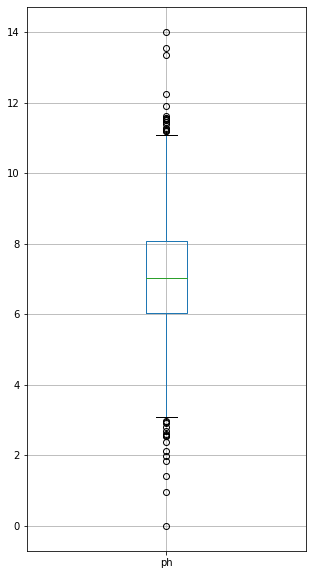

In [ ]:
data[['ph']].boxplot(figsize=(5,10))

Berdasarkan boxplot pH di atas, kita dapat melihat bahwa nilai outlier masih di dalam range nilai pH (1 - 14). Oleh karena itu, kita bisa menganggap bahwa tidak terdapat outlier pada atribut pH karena meski di luar garis whisker, nilai outlier tersebut tidak "ekstrem" dan masih dianggap normal karena masih di dalam range nilai pH. 

**Soal 2** : Berdasarkan Box Plot di atas, pilih satu atribut yang menurut Anda memiliki outlier paling banyak! Mengapa Anda memilih atribut tersebut? (Hint: perhatikan range nilai dari atribut, pada contoh di atas pH memiliki nilai 1 - 14. Anda bisa memberikan asumsi rentang nilai yang mungkin berdasarkan referensi yang Anda dapatkan di internet)!

> menurut saya, kolom yang memiliki outliers paling banyak adalah **Solids** karena dilihat dari boxplot ia memiliki banyak data point yang berada diluar batas atas dan batas bawah. Range nilai pada kolom Solids juga sangat besar dibandingkan dengan range nilai pada kolom yang lain. Hal ini diperkuat dengan nilai standard deviasinya yg begitu besar yaitu 8457.596593 (38% dari mean), sehingga kemungkinan besar semua outlier pada kolom ini dapat dianggap sebagai **true outlier**

> Kemudian, untuk kolom ph, hardness, chloramines, organic_carboon, turbidity walaupun ia terlihat memiliki banyak outlier, kolom-kolom tsb memiliki range nilai yang kecil dan standard deviasi yang kecil (persentasenya). sehingga outlier tersebut bisa jadi bukan outliers yang sebenarnya.

**Soal 3** : Implementasikan code untuk menampilkan banyaknya outlier pada atribut tersebut!

In [ ]:
# 3 Implementasi code di sini
Solids = water_df[['Solids']]
q1 = np.percentile(Solids, 25)
q3 = np.percentile(Solids, 75)
iqr = q3 - q1
upper_outlier = water_df[water_df['Solids'] > (q3+(1.5*iqr))]
lower_outlier = water_df[water_df['Solids'] < (q1-(1.5*iqr))]
total = len(upper_outlier) + len(lower_outlier)

print(f'outliers di Solids: {total}')

outliers di Solids: 35


### Menangani Outlier

Penanganan terhadap nilai outlier dapat dilakukan dengan beberapa cara, di antaranya:

*   Jika persentase outliers tidak signifikan, opsi yang mungkin dilakukan adalah drop column/row.
*   Jika terdapat human error, maka opsi yang mungkin adalah memperbaiki dengan manual.
*   Jika distribusi data dianggap normal atau model Machine Learning yang digunakan tidak sensitif terhadap outlier (misalnya CART), outlier tidak perlu ditangani
*   Penanganan lain adalah mengganti nilai outlier menggunakan metode winsorization atau imputation, dengan analisis yang lebih mendalam terhadap outlier tersebut

**Soal 4** : Apa yang dapat Anda lakukan untuk menangani outlier pada atribut  yang telah Anda pilih pada Soal 2? Implementasikan dengan code!

In [ ]:
# 4 Implementasi code di sini
# menghapus outlier dari dataset
indeks = []
indeks.extend(upper_outlier.index)
indeks.extend(lower_outlier.index)

persen = len(indeks)/len(water_df) * 100
print(f'persentase outlier: {persen:.2f}%')

# karena jumlah outlier yang sangat sedikit, maka saya memutuskan untuk menghapusnya dari dataset
water_df.drop(index=indeks)

persentase outlier: 1.45%


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Unnamed,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,NaN,2
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,NaN,2
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,NaN,2
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,NaN,2
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
2405,6.616731,195.096968,34277.76040,7.632639,NaN,417.465080,13.432557,47.945936,3.622379,NaN,2
2406,7.734569,230.919506,21776.59446,6.908591,NaN,395.114961,15.033557,92.697369,3.821456,NaN,2
2407,6.971577,185.906938,27959.98787,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,NaN,2
2408,4.709187,179.141018,22291.41858,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,NaN,2


### Bagaimana penanganan outlier pada atribut kategorikal?

Jika Anda perhatikan, pada bagian sebelumnya kita hanya menangani outlier pada data numerikal saja. Berdasarkan pemahaman Anda mengenai outlier, cobalah jawab pertanyaan berikut ini:

**Soal 5(a)**: Dari 11 atribut awal yang terdapat pada dataset water_df, atribut apa yang tergolong sebagai atribut kategorikal? Mengapa demikian?

> yang termasuk atribut kategorikal adalah **Potability**. karena nilai angka pada kolom potability merepresentasikan dua hal yang berbeda (dan diskret), yaitu 1 untuk bisa diminum dan 2 untuk tidak bisa diminum.

**Soal 5(b)**: Apakah terdapat outlier pada atribut tersebut? Jika ya, implementasikan dengan kode

value yang ada pada atribut potability: [2 1]
2    1998
1     412
Name: Potability, dtype: int64


<BarContainer object of 2 artists>

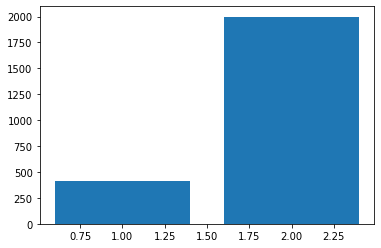

In [ ]:
# 5(b) Implementasi code di sini
potability = water_df["Potability"].unique()
print(f'value yang ada pada atribut potability: {potability}')

print('='*50)
counts = water_df['Potability'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)

# karena value yang ada pada atribut Potability sudah sesuai dengan yang seharusnya,
# yaitu cuma 1 dan 2, maka menurut saya atribut Potability tidak memiliki outlier.
# kemudian untuk perbandingan jumlah antara data yg memiliki potability 1 dengan 2 juga
# tidak terlalu jauh

**Soal 5(c)**: Bagaimana cara menangani outlier pada data kategorikal?

> cara menangani outlier pada data kategorikal adalah:
1. Exclusion, yaitu mengeluarkan outlier dari data (outlier tidak dipakai)
2. Replacement, yaitu mengubah value-nya menjadi value lain yang mirip berdasarkan perhitungan similarity (contoh cosine similarity, euclidian distance, dan manhattan distance)
3. Group the outlier, yaitu mengelompokkan outlier menjadi satu kategori baru misalnya kategori other (jika memungkinkan)

## Penanganan Missing Value 

Tidak jarang kita menemukan dataset dengan banyak nilai yang hilang (missing values). Biasanya kita bisa mengidentifikasi nilai tersebut dalam format: 'NaN', '?', 'T/A', atau hanya sebuah sel kosong di dataset. Penyebab dari missing value sendiri beragam, bisa diakibatkan oleh *data corruption* atau kesalahan pada saat *data recording*.

Untuk menangani missing values pada atribut tertentu, pertama-tama kita perlu melihat jenis data yang disimpan oleh atribut tersebut, apakah numerik atau kategorikal? 

*   Jika data numerik, maka dapat diisi dengan nilai mean, median, ataupun modus bergantung pada asumsi yang umumnya didasarkan pada bentuk distribusi data
*   Jika data kategorikal (jenis datanya nominal atau ordinal), maka dapat diisi dengan nilai modus 

Selanjutnya, baik pada data numerik ataupun kategorikal, kita dapat melakukan imputasi (penggantian nilai) dengan nilai konstanta berdasarkan asumsi atau algoritma yang kita buat. Pilihan lainnya adalah untuk menghapus data (row) atau bahkan atribut tersebut (column), jika kita merasa missing value tersebut tidak memiliki efek yang besar terhadap pemodelan Machine Learning.



In [ ]:
# Fungsi untuk mengecek missing value 
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])
  
cek_null(water_df)

                 Total     Percent
Unnamed           2410  100.000000
Sulfate            579   24.024896
ph                 374   15.518672
Trihalomethanes    121    5.020747


Berdasarkan pengecekan pada dataset, dapat kita temukan bahwa terdapat atribut "Unnamed" yang memiliki persentase missing value 100%. Secara nalar, kita dapat mengetahui bahwa kemungkinan atribut ini dihasilkan karena kesalahan pada proses recording data yang menjadikan atribut ini sama sekali tidak memiliki nilai. Oleh karena itu, kita dapat melakukan drop pada atribut tersebut.

In [ ]:
water_df = water_df.drop(['Unnamed'], axis = 1)
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,2
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,2
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,2
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,2
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,2


Selain itu, atribut dapat di-*drop* apabila:
* Atribut tidak intuitif 
* Atribut mempunyai banyak missing values.
* Atribut tidak informatif.
* Atribut dapat membahayakan untuk model tertentu.
* Atribut tersebut dapat dihasilkan dari atribut yang lain.

**Soal 6** : Berdasarkan operasi di atas, kita melihat bahwa terdapat 3 atribut lainnya yang memiliki missing values. Apa yang dapat Anda lakukan pada ketiga atribut tersebut? 

In [ ]:
# 6 Implementasi code di sini
# menurut saya, karena missing values pada ketiga atribut tersebut cukup besar (lebih dari 5%),
# maka menurut saya akan lebih baik jika missing values tersebut nilainya diganti dengan
# nilai mean/rata-rata dari setiap kolom karena ketiga kolom tsb memiliki bentuk distribusi 
# normal (dilihat dari visualisasi persebaran data)
for col in ['Sulfate', 'ph', 'Trihalomethanes']:
  mean = water_df[col].mean()
  water_df.loc[water_df[col].isna(), col] = mean

water_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Dimensionality Reduction with Principal Component Analysis (PCA) 

**Data Transformation**

Tahapan selanjutnya dari Data Pre-processing adalah transformasi data yang di antaranya menyangkut pemilihan fitur untuk pembuatan model. Beberapa pendekatan yang dapat dilakukan untuk data transformation di antaranya : aggregation, sampling, dimensionality reduction, feature subset selection, feature creation, discretization and binarization, dan variable transformation (referensi: [Pre-processing Technique in ML](https://towardsdatascience.com/data-preprocessing-in-data-mining-machine-learning-79a9662e2eb)). Pada Lab kali ini kita akan mempelajari dimensionality reduction menggunakan teknik PCA.

**Introduction to PCA**

PCA atau Principal Component Analysis merupakan teknik reduksi dimensi yang dilakukan untuk mentransformasi data dengan dimensi tinggi ke dimensi yang lebih rendah (mengurangi kompleksitas fitur). Secara matematis, teknik ini akan mentransformasi data ke dalam sistem koordinat baru dimana principal component pertama akan memiliki nilai variansi data yang lebih besar dibandingkan principal component kedua, dan seterusnya. (Baca selengkapnya pada PPT PCA yang terdapat di scele). 

## Deskripsi Dataset

Pada latihan PCA ini, kita akan menggunakan Wisconsin Breast Cancer dataset yang dapat diakses melalui link berikut: [Kaggle | Wisconsin Breast Cancer](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). Terdapat 569 baris dengan 32 atribut pada dataset ini. 


In [ ]:
# Import dataset 
breast_cancer = pd.read_csv('wisconsin_breast_cancer.csv')

In [ ]:
# Melihat shape dari dataframe
total_rows, total_attributes = breast_cancer.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data: 569
Jumlah atribut: 32


In [ ]:
# Melihat nama atribut dalam dataframe
print("-----Berikut adalah daftar kolom/attribut dalam dataset-----")
print()
print(breast_cancer.columns)

-----Berikut adalah daftar kolom/attribut dalam dataset-----

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
print("-----Berikut adalah daftar kolom/attribut yang bertipe numerik-----")
print()
print(breast_cancer.select_dtypes(np.number).columns)
print()
print("Jumlah data yang numerik", len(breast_cancer.select_dtypes(np.number).columns))

-----Berikut adalah daftar kolom/attribut yang bertipe numerik-----

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Jumlah data yang numerik 31


In [ ]:
print("-----Berikut adalah daftar kolom/attribut yang bertipe kategorik-----")
print()
print(breast_cancer.select_dtypes(object).columns)
print()
print("Jumlah data yang kategorik", len(breast_cancer.select_dtypes(object).columns))

-----Berikut adalah daftar kolom/attribut yang bertipe kategorik-----

Index(['diagnosis'], dtype='object')

Jumlah data yang kategorik 1


In [ ]:
# Melihat 5 elemen teratas dalam dataframe
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Melihat deskripsi dataset
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Tahapan PCA

### Manual

In [ ]:
# Membagi dataframe menjadi X (atribut) dan Y (target)
X_manual = breast_cancer.drop(['diagnosis'], axis=1)
Y_manual = breast_cancer['diagnosis']

In [ ]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels dalam label target Y
Y_manual = label_encoder.fit_transform(Y_manual)

In [ ]:
# Melakukan scaling
scaler = StandardScaler()
scaler.fit(X_manual)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(X_manual)

In [ ]:
# Covariance Matrix
features = scaled_data.T
cov_matrix = np.cov(features)

In [ ]:
#Eigen decomposition
values, vectors = np.linalg.eig(cov_matrix)

print(values[:5])

[13.31145188  5.70683496  2.84038694  1.98484548  1.65171815]


In [ ]:
# Menampilkan nilai explained variance
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values) * 100)
 
print(np.sum(explained_variances))
print(explained_variances)

100.0
[42.86470133597766, 18.37679151062453, 9.146435639067088, 6.391474762638856, 5.318759048637677, 3.982815186491568, 3.1557201259887306, 2.166945059863522, 1.4864271859401237, 1.300429342784264, 1.126306373905724, 0.9480336565112111, 0.8424094348287942, 0.7784845624482283, 0.5063666103868494, 0.30364040582510565, 0.2574514469942777, 0.19047184598312064, 0.169649014757307, 0.15845783116043247, 0.10022833622885716, 0.09658453428849542, 0.08848556065535446, 0.07822265231410921, 0.05819148668742819, 0.04993461188706784, 0.02636031883889048, 0.022251944714196975, 0.0004291619563332686, 0.0024141163043263887, 0.005126895309868562]


Berdasarkan hasil PCA yang kita lakukan secara manual, kita mendapatkan nilai explained variance untuk Principal Component 1, 2, ..., 31 yaitu 42.86, 18.38, dan seterusnya. Bisa kita perhatikan juga  bahwa untuk masing-masing principal component, semakin tinggi nilai eigen value maka semakin tinggi juga nilai explained variance.

### Menggunakan library sklearn

Selain dilakukan secara manual, kita juga dapat memanfaatkan library yang sudah disediakan oleh sklearn untuk melakukan PCA. Berikut adalah langkah yang dilakukan:

In [ ]:
# Membagi dataframe menjadi X (atribut) dan Y (target)
X = breast_cancer.drop(['diagnosis'], axis=1)
Y = breast_cancer['diagnosis']

In [ ]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels dalam label target Y
Y = label_encoder.fit_transform(Y)

In [ ]:
# Melakukan scaling
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(X)

In [ ]:
# Import modul PCA
from sklearn.decomposition import PCA 

# initialize PCA
pca = PCA()  

In [ ]:
# Fit the model with "scaled_data".
pca.fit(scaled_data)

PCA()

In [ ]:
# Transformasi PCA
trans_pca = pca.transform(scaled_data)

In [ ]:
# Melakukan pengecekan shape
trans_pca.shape

(569, 31)

In [ ]:
# Menampilkan nilai explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([4.28647013e-01, 1.83767915e-01, 9.14643564e-02, 6.39147476e-02,
       5.31875905e-02, 3.98281519e-02, 3.15572013e-02, 2.16694506e-02,
       1.48642719e-02, 1.30042934e-02, 1.12630637e-02, 9.48033657e-03,
       8.42409435e-03, 7.78484562e-03, 5.06366610e-03, 3.03640406e-03,
       2.57451447e-03, 1.90471846e-03, 1.69649015e-03, 1.58457831e-03,
       1.00228336e-03, 9.65845343e-04, 8.84855607e-04, 7.82226523e-04,
       5.81914867e-04, 4.99346119e-04, 2.63603188e-04, 2.22519447e-04,
       5.12689531e-05, 2.41411630e-05, 4.29161956e-06])

Dapat kita perhatikan bahwa nilai explained variance menggunakan library sklearn ataupun menggunakan PCA secara manual sama saja.

In [ ]:
# Menampilkan nilai cumulative explained variants
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 42.86470134,  61.24149285,  70.38792849,  76.77940325,
        82.0981623 ,  86.08097748,  89.23669761,  91.40364267,
        92.89006986,  94.1904992 ,  95.31680557,  96.26483923,
        97.10724866,  97.88573323,  98.39209984,  98.69574024,
        98.95319169,  99.14366353,  99.31331255,  99.47177038,
        99.57199872,  99.66858325,  99.75706881,  99.83529146,
        99.89348295,  99.94341756,  99.96977788,  99.99202983,
        99.99715672,  99.99957084, 100.        ])

Text(0, 0.5, 'Explained vairance')

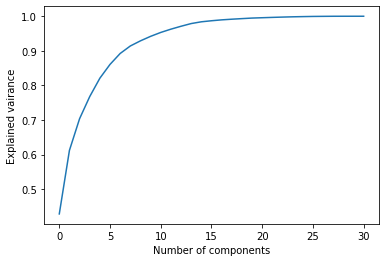

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained vairance")

Berdasarkan operasi di atas, kita dapat melihat bahwa nilai explained variance sebanyak 95% atau 95% dari variansi data sudah bisa kita dapatkan hanya dengan menggunakan 11 principal components (11 dari 31 atribut). Selanjutnya mari kita visualisasikan data sebelum dan sesudah dilakukan PCA

In [ ]:
from numpy.random import rand

# Melakukan invers PCA 2 atribut
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0 
    return pca.inverse_transform(transformed)

LL = inverse_pca(trans_pca, pca, 21)

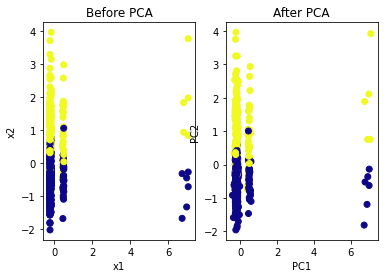

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(scaled_data[:,0],scaled_data[:,1],c=Y, cmap='plasma')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(LL[:,0],LL[:,1],c=Y, cmap='plasma')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Kita dapat melihat bahwa perbandingan visualisasi data menggunakan atribut asli dengan visualisasi menggunakan PC1 (Principal Component 1) dan PC2 (Principal Component 2) menunjukkan visualisasi scatter plot yang cukup mirip. Hal ini karena PC1 dan PC2 "menangkap" variasi terbesar dari dataset 

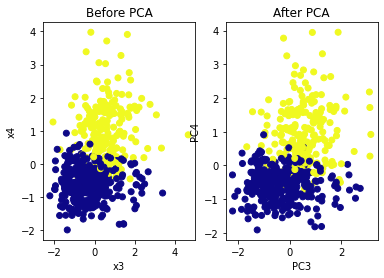

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(scaled_data[:,2],scaled_data[:,3],c=Y, cmap='plasma')
axes[0].set_xlabel('x3')
axes[0].set_ylabel('x4')
axes[0].set_title('Before PCA')
axes[1].scatter(LL[:,2],LL[:,3],c=Y, cmap='plasma')
axes[1].set_xlabel('PC3')
axes[1].set_ylabel('PC4')
axes[1].set_title('After PCA')
plt.show()

Sementara itu, ketika kita membandingkan visualisasi data asli dengan PC3 dan PC4, kita dapat melihat bahwa ada perbedaan yang lebih besar, misalnya kita lihat bentuk scatter plot untuk kelompok berwarna biru lebih menyebar pada visualisasi "After PCA" dibandingkan "Before PCA". Hal ini karena variasi data pada PC3 dan PC4 lebih kecil dibandingkan PC1 dan PC2

Selain menggunakan grafik dua dimensi (2D), kita juga dapat melakukan visualisasi PCA menggunakan grafik tiga dimensi (3D). Contohnya adalah sebagai berikut:

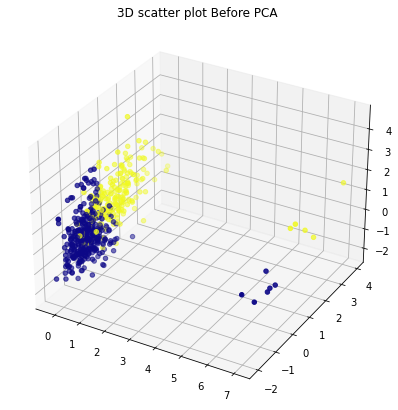

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(scaled_data[:,0],scaled_data[:,1], scaled_data[:,2], c=Y, cmap='plasma')
plt.title("3D scatter plot Before PCA")
plt.show()

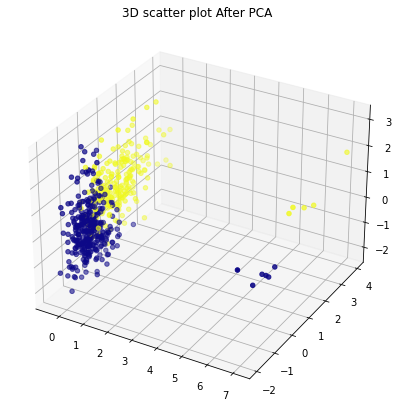

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(LL[:,0],LL[:,1], LL[:,2], c=Y, cmap='plasma')
plt.title("3D scatter plot After PCA")
plt.show()

Pada visualisasi di atas, kita melihat proyeksi tiga dimensi untuk scatter plot sebelum PCA (menggunakan data asli) dan setelah PCA (menggunakan PC1, PC2, PC3). Dapat kita lihat bahwa persebaran datanya mirip, namun masih terdapat beberapa perbedaan di antara keduanya, hal ini karena tiga principal component yang kita pilih tidak menangkap 100% variasi dataset. 

## Refleksi

**Soal 7** : Mengapa di dalam PCA dilakukan scaling? 

> karena agar tidak terjadi bias pada saat dilakukan perbandingan variance pada saat proses PCA. sehingga, semua fitur akan memiliki bobot yang sama dan menghindari bias/kecenderungan untuk memiliki tendensi pada fitur dengan range nilai yg besar

**Soal 8** : Berdasarkan contoh implementasi PCA diatas, jelaskan secara ringkas tiap step yang dilakukan

> step
1. membagi atribut sebagai predictor dan target
2. melakukan scaling pada predictor dan label encoder pada target
3. menghitung matrix covariance dari predictor
4. mendapatkan eigen value dan eigen vector dari matrix covariance di poin (3)
5. mengurutkan eigen value dan eigen vector untuk menentukan komponen utama
6. membuat vektor baru (hasil transformasi) berdasarkan komponen utama yang dipilih

**Soal 9** : Menurut Anda, kapan PCA perlu dilakukan?
> PCA dilakukan jika data training memiliki jumlah data yang banyak disertai dengan jumlah fitur yang sangat banyak. PCA dilakukan dengan tujuan untuk mengurangi dimensi fitur data training agar proses training model bisa menjadi lebih cepat dan efisien.